# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [87]:
city_info = []

url = "http://api.openweathermap.org/data/2.5/weather?"
counter = 0
for city in cities[:10]:
   
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    counter=counter+1
    #print(query_url)
    
    try:
        city_num = counter
        city = response["name"]
        country = response["sys"]["country"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        date = response["dt"]
        maxtemp = response["main"]["temp_max"]
        windspeed = response["wind"]["speed"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]

        city_info.append([city_num, city, country, date, humidity, cloudiness, lat, lng, maxtemp, windspeed])
        print(f"Counter  {counter} {city}")
        time.sleep(.2)
    except:
        print("City not found")



Counter  1 Ushuaia
Counter  2 Zhigansk
Counter  3 Madhipura
Counter  4 Bluff
Counter  5 Chui
Counter  6 Nampula
Counter  7 Rikitea
Counter  8 Albany
Counter  9 East London
Counter  10 Hermanus


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
city_info

[[1, 'Ushuaia', 'AR', 1618971681, 53, 20, -54.8, -68.3, 280.15, 2.06],
 [2, 'Zhigansk', 'RU', 1618971681, 82, 87, 66.7697, 123.3711, 261.74, 2.3],
 [3, 'Madhipura', 'IN', 1618971682, 40, 33, 25.9167, 86.7833, 303.06, 7.49],
 [4, 'Bluff', 'NZ', 1618971682, 92, 100, -46.6, 168.3333, 284.26, 6.71],
 [5, 'Chui', 'UY', 1618971682, 80, 29, -33.6971, -53.4616, 292.49, 6.5],
 [6, 'Nampula', 'MZ', 1618971683, 94, 40, -15.1165, 39.2666, 293.15, 5.14],
 [7, 'Rikitea', 'PF', 1618971683, 72, 22, -23.1203, -134.9692, 298.42, 0.35],
 [8, 'Albany', 'US', 1618971451, 54, 88, 42.6001, -73.9662, 281.48, 2.23],
 [9, 'East London', 'ZA', 1618971684, 79, 98, -33.0153, 27.9116, 292.14, 4.66],
 [10, 'Hermanus', 'ZA', 1618971599, 90, 100, -34.4187, 19.2345, 289.26, 1.79]]

In [94]:
city_data_df = pd.DataFrame(city_info, columns=["city_num","city", "country", "date", "humidity", "cloudiness","lat", "long", "maxtemp", "windspeed"])
city_data_df

,city_num,city,country,date,humidity,cloudiness,lat,long,maxtemp,windspeed
0,1,Ushuaia,AR,1618971681,53,20,-54.8000,-68.3000,280.15,2.06
1,2,Zhigansk,RU,1618971681,82,87,66.7697,123.3711,261.74,2.30
2,3,Madhipura,IN,1618971682,40,33,25.9167,86.7833,303.06,7.49
3,4,Bluff,NZ,1618971682,92,100,-46.6000,168.3333,284.26,6.71
4,5,Chui,UY,1618971682,80,29,-33.6971,-53.4616,292.49,6.50
5,6,Nampula,MZ,1618971683,94,40,-15.1165,39.2666,293.15,5.14
6,7,Rikitea,PF,1618971683,72,22,-23.1203,-134.9692,298.42,0.35
7,8,Albany,US,1618971451,54,88,42.6001,-73.9662,281.48,2.23
8,9,East London,ZA,1618971684,79,98,-33.0153,27.9116,292.14,4.66
9,10,Hermanus,ZA,1618971599,90,100,-34.4187,19.2345,289.26,1.79


In [ ]:
city_info

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
#  Get the indices of cities that have humidity over 100%.
# none found

In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

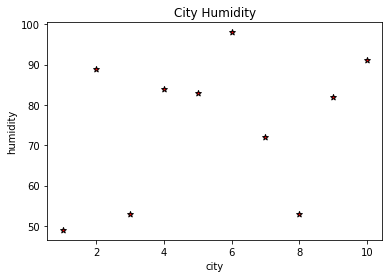

In [81]:
clean_city_data_df = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['city_num']
y_values = clean_city_data['humidity']

plt.scatter( x_values, y_values, marker="*", facecolors="red", edgecolors="black")
plt.xlabel('city')
plt.ylabel('humidity')
plt.title( "City Humidity")
plt.show()


## Latitude vs. Temperature Plot

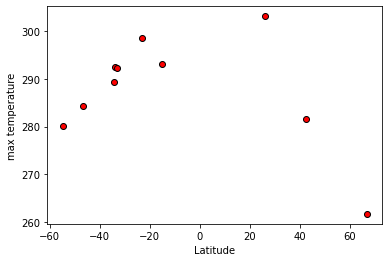

In [91]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['lat']
y_values = clean_city_data['maxtemp']

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('max temperature')
plt.show()


## Latitude vs. Humidity Plot

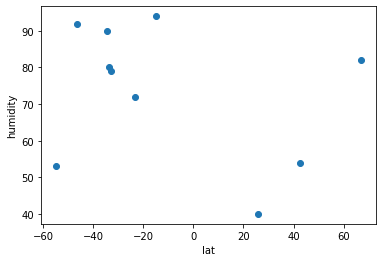

In [92]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['lat']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('humidity')
plt.show()


## Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: '../images/cloud_lat.png'

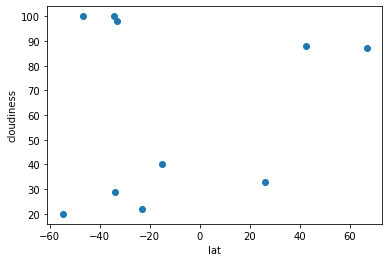

In [97]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['lat']
y_values = clean_city_data['cloudiness']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('cloudiness')
plt.savefig("../images/cloud_lat.png")

plt.show()


## Latitude vs. Wind Speed Plot

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['lat']
y_values = clean_city_data['windspeed']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('windspeed')
plt.show()


## Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['lat']
y_values = clean_city_data['windspeed']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('windspeed')
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['name']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('name')
plt.ylabel('City info')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['name']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('name')
plt.ylabel('City info')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['name']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('name')
plt.ylabel('City info')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['name']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('name')
plt.ylabel('City info')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['name']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('name')
plt.ylabel('City info')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
clean_city_data = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data['name']
y_values = clean_city_data['humidity']

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('name')
plt.ylabel('City info')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression